IMDB Reviews Dataset in TF: https://www.tensorflow.org/datasets/catalog/imdb_reviews

Coursera Colab links:

> IMBDreviews LSTM:  https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%203%20-%20Lesson%201a.ipynb

> IMBDreviews Multi-layer LSTM: https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%203%20-%20Lesson%201b.ipynb

> CNN 1D: https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%203%20-%20Lesson%201c.ipynb



Subword Tokenizer in TF: https://www.tensorflow.org/datasets/api_docs/python/tfds/features/text/SubwordTextEncoder

Keras Text Preprocessing: https://keras.io/preprocessing/text/

The same in TF library: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

Custom Callback: https://www.tensorflow.org/guide/keras/custom_callback

LSTM: https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)



TensorFlow 2.x selected.
2.2.0-rc1


# Importing the dataset from TF:

In [2]:
# Import TF dataset

# if we have to download the TF datasets:
# !pip install -q tensorflow-datasets

import tensorflow_datasets as tfds

# Load imdb review ds available in tf:
imdb, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteB4MT6G/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteB4MT6G/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteB4MT6G/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
# Splitting into Train and Test data:

train_data, test_data = imdb['train'], imdb['test']

print(train_data)  # data is stored in a tensor of two columns: col 1 are the texts and col 2 the labels!
print(test_data)

<DatasetV1Adapter shapes: ((None,), ()), types: (tf.int64, tf.int64)>
<DatasetV1Adapter shapes: ((None,), ()), types: (tf.int64, tf.int64)>


# Subwords Tokenizer 

Learn all about subwords text encoder:
https://www.tensorflow.org/datasets/api_docs/python/tfds/features/text/SubwordTextEncoder


In [5]:
# Access the subwords tokenizer with this code:
tokenizer = info.features['text'].encoder   # this creates the tokenizer vocabulary
                                            # Note that this is case and punctuation sensitive
# Learn all about subwords text encoder:
# https://www.tensorflow.org/datasets/api_docs/python/tfds/features/text/SubwordTextEncoder

print(tokenizer.subwords)  # tokens or vocabulary

print(tokenizer.vocab_size)  # size of the vocabulary


['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [6]:
# How to encode and decode strings:

sample_string = 'TensorFlow, from basics to mastery.'

tokenized_string = tokenizer.encode(sample_string)  # encoded string
print('Tokenized string is: %s' %tokenized_string)

decoded_string = tokenizer.decode(tokenized_string)  # decoded string
print('The original string is: %s' %decoded_string)



# Visualise the Tokens to word map for that string:

for ts in tokenized_string :
  print('%s ---> %s' %(ts, tokenizer.decode([ts])))

Tokenized string is: [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050, 7975]
The original string is: TensorFlow, from basics to mastery.
6307 ---> Ten
2327 ---> sor
4043 ---> Fl
2120 ---> ow
2 ---> , 
48 ---> from 
4249 ---> basi
4429 ---> cs 
7 ---> to 
2652 ---> master
8050 ---> y
7975 ---> .


## Tokenizing and Padding the TF dataset:

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_data = train_data.shuffle(BUFFER_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_data))
test_data = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

# **DNN** with Embedding

In [0]:
embedding_dim = 64

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=tokenizer.vocab_size, output_dim=embedding_dim),  # input_length is not needed
                             tf.keras.layers.GlobalAveragePooling1D(),  # in this case, the Flatten would make it to crash
                             tf.keras.layers.Dense(6, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')  # it's a binary classification problem
])

model.summary()


from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Training the NN:

import numpy as np 

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    targ = 0.99
    if (logs['accuracy']>targ) :
    # if logs.get('accuracy').astype(float)>targ :
    # if np.less(targ, logs.get('accuracy')) :
      print('Reached %0.1f%% training accuracy. Training converged and stopping!' %(targ*100))
      self.model.stop_training = True

callback=myCallback()


history = model.fit(train_data, epochs=10, validation_data=test_data)  # , verbose=2)  # , callbacks=[callback])

Epoch 1/10
391/391 [==============================] - 11s 28ms/step - loss: 0.6751 - accuracy: 0.6159 - val_loss: 0.6283 - val_accuracy: 0.7094
Epoch 2/10
391/391 [==============================] - 11s 28ms/step - loss: 0.5218 - accuracy: 0.8004 - val_loss: 0.4498 - val_accuracy: 0.8271
Epoch 3/10
384/391 [============================>.] - ETA: 0s - loss: 0.3724 - accuracy: 0.8684

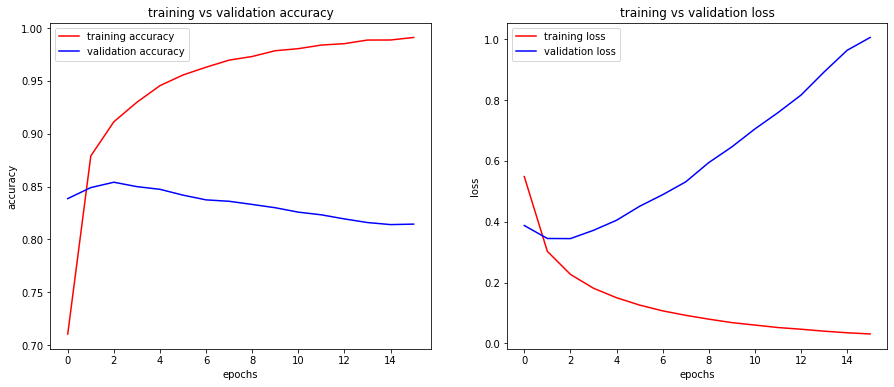

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(acc, 'r', label='training accuracy')
plt.plot(val_acc, 'b', label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('training vs validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, 'r', label='training loss')
plt.plot(val_loss, 'b', label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('training vs validation loss')
plt.legend()

plt.show()

## Single-Layer **LSTM NN** with Embedding

In [8]:
embedding_dim = 64

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=tokenizer.vocab_size, output_dim=embedding_dim),  # input_length is not needed
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),  # Bidirectional LSTM of 64 'time-steps' -> this will give 128 units because it's bidirectional. No need to flatten afterwards!!!
                             tf.keras.layers.Dense(6, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')  # it's a binary classification problem
])

model.summary()


from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 6)                 774       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 590,669
Trainable params: 590,669
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Training the NN:

import numpy as np 

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    targ = 0.99
    if (logs['accuracy']>targ) :
    # if logs.get('accuracy').astype(float)>targ :
    # if np.less(targ, logs.get('accuracy')) :
      print('Reached %0.1f%% training accuracy. Training converged and stopping!' %(targ*100))
      self.model.stop_training = True

callback=myCallback()


history = model.fit(train_data, epochs=10, validation_data=test_data)  # , verbose=2)  # , callbacks=[callback])

Epoch 1/10
391/391 [==============================] - 71s 183ms/step - loss: 0.5524 - accuracy: 0.7160 - val_loss: 0.4580 - val_accuracy: 0.7998
Epoch 2/10
391/391 [==============================] - 70s 179ms/step - loss: 0.3576 - accuracy: 0.8576 - val_loss: 0.3615 - val_accuracy: 0.8541
Epoch 3/10
391/391 [==============================] - 70s 180ms/step - loss: 0.2888 - accuracy: 0.8896 - val_loss: 0.3994 - val_accuracy: 0.8280
Epoch 4/10
391/391 [==============================] - 71s 181ms/step - loss: 0.3991 - accuracy: 0.8185 - val_loss: 0.6174 - val_accuracy: 0.6556
Epoch 5/10
391/391 [==============================] - 71s 181ms/step - loss: 0.3923 - accuracy: 0.8318 - val_loss: 0.4863 - val_accuracy: 0.7983
Epoch 6/10
391/391 [==============================] - 71s 181ms/step - loss: 0.2532 - accuracy: 0.9023 - val_loss: 0.4486 - val_accuracy: 0.8335
Epoch 7/10
391/391 [==============================] - 70s 179ms/step - loss: 0.2040 - accuracy: 0.9249 - val_loss: 0.4764 - val_ac

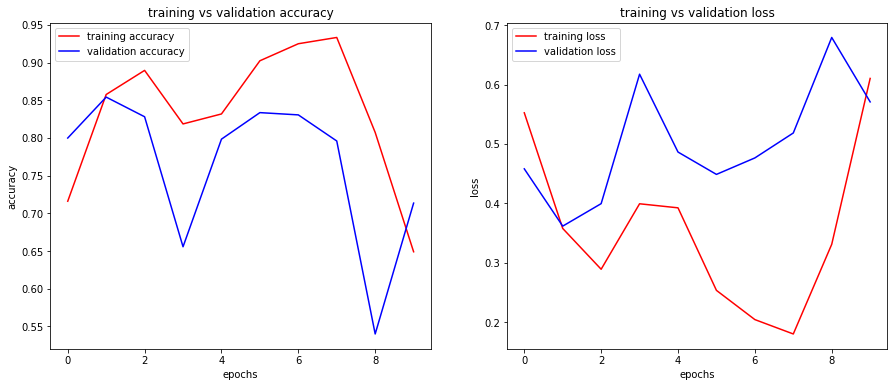

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(acc, 'r', label='training accuracy')
plt.plot(val_acc, 'b', label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('training vs validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, 'r', label='training loss')
plt.plot(val_loss, 'b', label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('training vs validation loss')
plt.legend()

plt.show()

## Multi-Layer **LSTM NN** with Embedding

In [13]:
embedding_dim = 64

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=tokenizer.vocab_size, output_dim=embedding_dim),  # input_length is not needed
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),  # Bidirectional LSTM of 64 'time-steps'; to run another LSTM underneath, we need to pass return_sequences!
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),  # Bidirectional LSTM of 32 'time-steps'
                             tf.keras.layers.Dense(6, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')  # it's a binary classification problem
])

model.summary()


from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 631,501
Trainable params: 631,501
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Training the NN:

import numpy as np 

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    targ = 0.99
    if (logs['accuracy']>targ) :
    # if logs.get('accuracy').astype(float)>targ :
    # if np.less(targ, logs.get('accuracy')) :
      print('Reached %0.1f%% training accuracy. Training converged and stopping!' %(targ*100))
      self.model.stop_training = True

callback=myCallback()


history = model.fit(train_data, epochs=10, validation_data=test_data)  # , verbose=2)  # , callbacks=[callback])

Epoch 1/10
391/391 [==============================] - 136s 348ms/step - loss: 0.6007 - accuracy: 0.6825 - val_loss: 0.6094 - val_accuracy: 0.7104
Epoch 2/10
391/391 [==============================] - 137s 351ms/step - loss: 0.4588 - accuracy: 0.7993 - val_loss: 0.4962 - val_accuracy: 0.7762
Epoch 3/10
391/391 [==============================] - 136s 349ms/step - loss: 0.3868 - accuracy: 0.8370 - val_loss: 0.4558 - val_accuracy: 0.7940
Epoch 4/10
391/391 [==============================] - 138s 354ms/step - loss: 0.4180 - accuracy: 0.8209 - val_loss: 0.4943 - val_accuracy: 0.7816
Epoch 5/10
391/391 [==============================] - 138s 352ms/step - loss: 0.3665 - accuracy: 0.8474 - val_loss: 0.4595 - val_accuracy: 0.7924
Epoch 6/10
391/391 [==============================] - 137s 352ms/step - loss: 0.2739 - accuracy: 0.8928 - val_loss: 0.4320 - val_accuracy: 0.8253
Epoch 7/10
391/391 [==============================] - 139s 355ms/step - loss: 0.2350 - accuracy: 0.9128 - val_loss: 0.3973 -

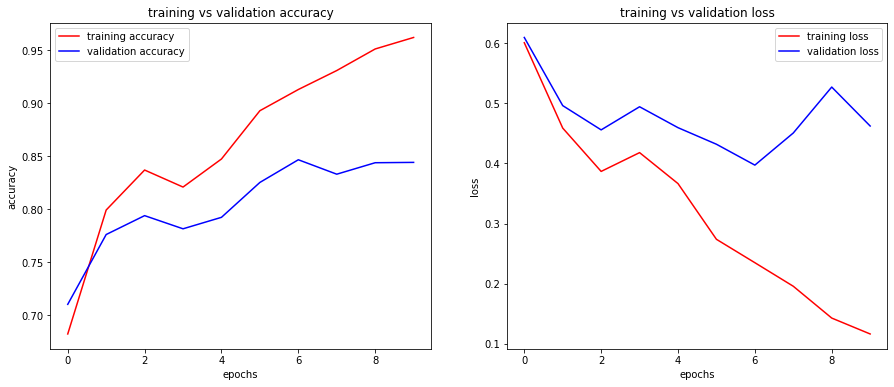

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(acc, 'r', label='training accuracy')
plt.plot(val_acc, 'b', label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('training vs validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, 'r', label='training loss')
plt.plot(val_loss, 'b', label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('training vs validation loss')
plt.legend()

plt.show()

## **1D CNN** with Embedding

In [17]:
embedding_dim = 64

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=tokenizer.vocab_size, output_dim=embedding_dim),  # input_length is not needed
                             tf.keras.layers.Conv1D(64, 5, activation='relu'),  # Convolutional layer to take filters of 5 words from each sentence.
                             tf.keras.layers.GlobalAveragePooling1D(),   # we need to flatten the convolution
                             tf.keras.layers.Dense(6, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')  # it's a binary classification problem
])

model.summary()


from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          20544     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 544,781
Trainable params: 544,781
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Training the NN:

import numpy as np 

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    targ = 0.99
    if (logs['accuracy']>targ) :
    # if logs.get('accuracy').astype(float)>targ :
    # if np.less(targ, logs.get('accuracy')) :
      print('Reached %0.1f%% training accuracy. Training converged and stopping!' %(targ*100))
      self.model.stop_training = True

callback=myCallback()


history = model.fit(train_data, epochs=10, validation_data=test_data)  # , verbose=2)  # , callbacks=[callback])

Epoch 1/10
391/391 [==============================] - 26s 65ms/step - loss: 0.4911 - accuracy: 0.7647 - val_loss: 0.3274 - val_accuracy: 0.8749
Epoch 2/10
391/391 [==============================] - 17s 43ms/step - loss: 0.2507 - accuracy: 0.9094 - val_loss: 0.3124 - val_accuracy: 0.8796
Epoch 3/10
391/391 [==============================] - 15s 39ms/step - loss: 0.1940 - accuracy: 0.9308 - val_loss: 0.3330 - val_accuracy: 0.8771
Epoch 4/10
391/391 [==============================] - 15s 38ms/step - loss: 0.1559 - accuracy: 0.9448 - val_loss: 0.3805 - val_accuracy: 0.8688
Epoch 5/10
391/391 [==============================] - 14s 37ms/step - loss: 0.1317 - accuracy: 0.9544 - val_loss: 0.4129 - val_accuracy: 0.8676
Epoch 6/10
391/391 [==============================] - 15s 37ms/step - loss: 0.1137 - accuracy: 0.9606 - val_loss: 0.4578 - val_accuracy: 0.8658
Epoch 7/10
391/391 [==============================] - 14s 36ms/step - loss: 0.0961 - accuracy: 0.9684 - val_loss: 0.5219 - val_accuracy:

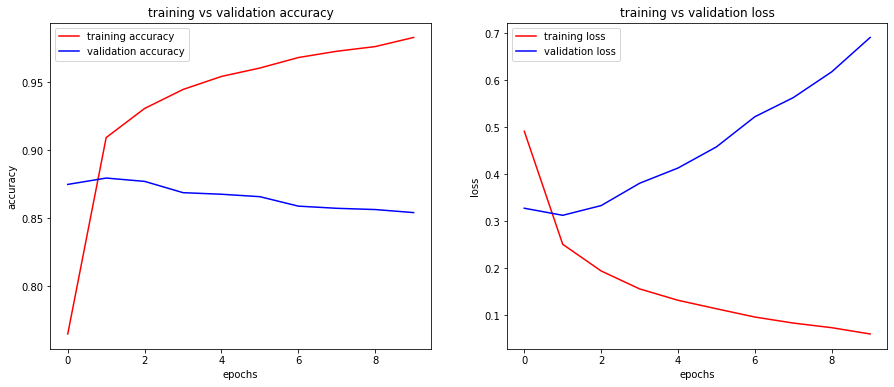

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(acc, 'r', label='training accuracy')
plt.plot(val_acc, 'b', label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('training vs validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, 'r', label='training loss')
plt.plot(val_loss, 'b', label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('training vs validation loss')
plt.legend()

plt.show()